## 1.生成类激活可视化图
### 说明：本部分内容提前采用了教材5.4.3节的内容，如果看不懂，也不必着急，可以等到看完对应章节的讲解后再实现

In [20]:
from keras.models import load_model
#加载未使用数据增强的网络模型

#network_cnn_maxpool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_maxpool.h5')
model = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_deeper.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
#network_cnn_maxpool.get_layer('conv2d_20').output_shape[-1]  

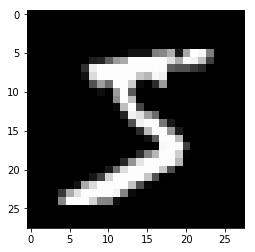

In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt

# -*- coding: utf-8 -*-
(train_images, train_labels),(test_images, test_labels)=mnist.load_data(path = 'D:/2-AI读书学习笔记/99-dataset-lib/mnist/mnist.npz')
#以图片形式展现


plt.imshow(train_images[0],cmap = plt.get_cmap('gray'))
plt.show()

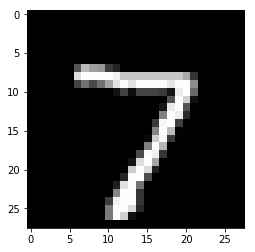

In [23]:
import matplotlib.pyplot as plt

plt.imshow(test_images[0],cmap = plt.get_cmap('gray'))
plt.show()

In [24]:
preprocessed_test_images_7 = test_images[0].reshape((1,28,28,1))
preprocessed_test_images_7 = preprocessed_test_images_7.astype('float32')/255

In [25]:
#network_cnn_maxpool.predict(preprocessed_test_images_7).max()

In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)         

In [27]:
# import numpy as np
# from keras import backend as K
# import tensorflow as tf
# import cv2
# tf.compat.v1.disable_eager_execution() 

# # src_sample = test_images[0]
# # sample_size = (28,28)
# # class_output_no = 7
# def get_heatmap(src_sample,processed_sample,sample_size,model,layer_name,class_output_no):
    
#     #获取模型对指定类别的输出
#     model_output = model.output[:,class_output_no] #argmax
#     #获取指定层实例
#     last_conv_layer = model.get_layer(layer_name)
#     #求模型输出关于指定层输出的梯度
#     grads = K.gradients(model_output, last_conv_layer.output)[0]
#     #求平均梯度
#     averaged_grads = K.mean(grads, axis =(0,1,2))
#     #创建函数，x:模型输入张量 y：平均梯度、指定层的输出
#     iterate = K.function([model.input], [averaged_grads,last_conv_layer.output[0]])
#     #带入实际样本值
#     averaged_grads_output, last_conv_layer_output = iterate([preprocessed_sample])
    
#     maps = model.get_layer(layer_name).output_shape[-1]
#     for i in range(maps):
#         last_conv_layer_output[:,:,i] *= averaged_grads_output[i]
       
#     #为了将热力图可视化，去除所有负数
#     heatmap_output = np.maximum(heatmap_output, 0)
#     #归一化处理
#     heatmap_output = heatmap_output / np.max(heatmap_output)
    
    
#     heatmap_output = cv2.resize(heatmap_output,sample_size)

#     heatmap_output = np.uint8(255 * heatmap_output)

#     heatmap_output = cv2.applyColorMap(heatmap_output, cv2.COLORMAP_JET)

#     src_RGB = cv2.cvtColor(src_sample, cv2.COLOR_GRAY2BGR)

#     superimposed_output = heatmap_output * 0.4 + src_RGB

#     save_path = "D:/2-AI读书学习笔记/0-python深度学习/1-dataset_repo/mnist_result.jpg"
#     cv2.imencode('.jpg',superimposed_output)[1].tofile(save_path)

    
#     return save_path

In [28]:
import numpy as np

model_output = model.output[:,7] #argmax
last_conv_layer = model.get_layer('max_pooling2d_6')

In [29]:
from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution() 

grads = K.gradients(model_output, last_conv_layer.output)[0]

In [30]:
averaged_grads = K.mean(grads, axis =(0,1,2))

In [31]:
iterate = K.function([model.input], [averaged_grads,last_conv_layer.output[0]])

In [32]:
averaged_grads_7, last_conv_layer_7 = iterate([preprocessed_test_images_7])

In [33]:
#last_conv_layer_x 形状为 (15,15,128)
for i in range(64):
    last_conv_layer_7[:,:,i] *= averaged_grads_7[i]

In [34]:
heatmap_7 = np.mean(last_conv_layer_7, axis = -1)

In [35]:
heatmap_7.shape

(3, 3)

In [36]:
#为了将热力图可视化，去除所有负数
heatmap_7 = np.maximum(heatmap_7, 0)
#归一化处理
heatmap_7 = heatmap_7 / np.max(heatmap_7)

In [37]:
heatmap_7.shape

(3, 3)

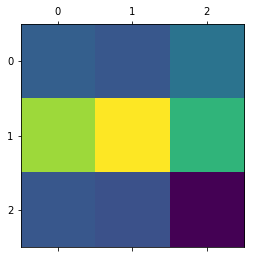

In [38]:
plt.matshow(heatmap_7)

In [39]:
import cv2

heatmap_7 = cv2.resize(heatmap_7, (28,28))

heatmap_7 = np.uint8(255 * heatmap_7)

heatmap_7 = cv2.applyColorMap(heatmap_7, cv2.COLORMAP_JET)


src_RGB = cv2.cvtColor(test_images[0], cv2.COLOR_GRAY2BGR)

superimposed_7 = heatmap_7 * 0.4 + src_RGB

save_path = "D:/2-AI读书学习笔记/0-python深度学习/1-dataset_repo/mnist_result.jpg"
cv2.imencode('.jpg',superimposed_7)[1].tofile(save_path)

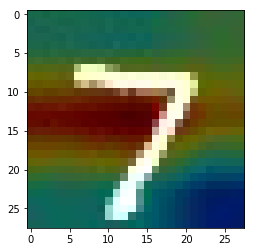

In [40]:
from keras.preprocessing import image
heatmap_img = image.load_img('D:/2-AI读书学习笔记/0-python深度学习/1-dataset_repo/mnist_result.jpg')
plt.imshow(heatmap_img)

## 2.生成过滤器可视化图
### 说明：本部分内容提前采用了教材5.4.1节的内容，如果看不懂，也不必着急，可以等到看完对应章节的讲解后再实现

In [92]:
from keras.models import load_model
#加载未使用数据增强的网络模型

#network_cnn_maxpool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_maxpool.h5')
model = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_strid2.h5')

In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


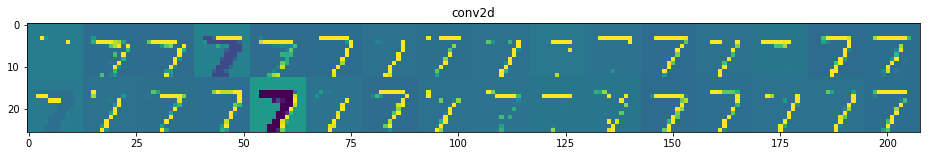

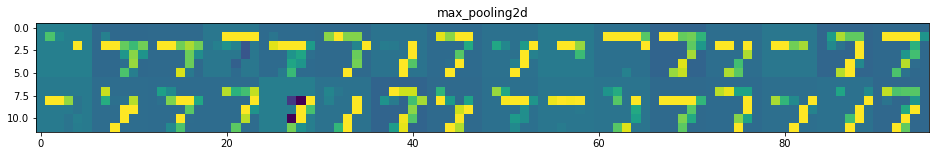

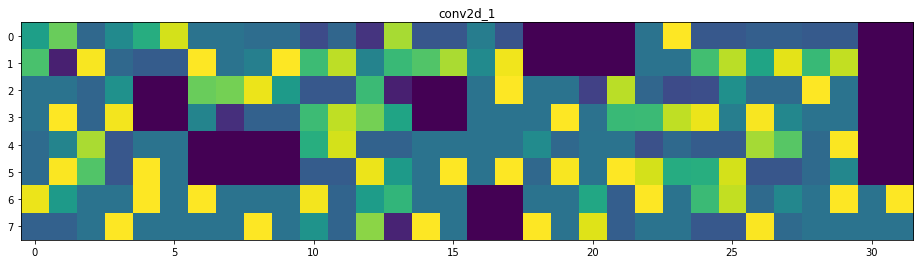

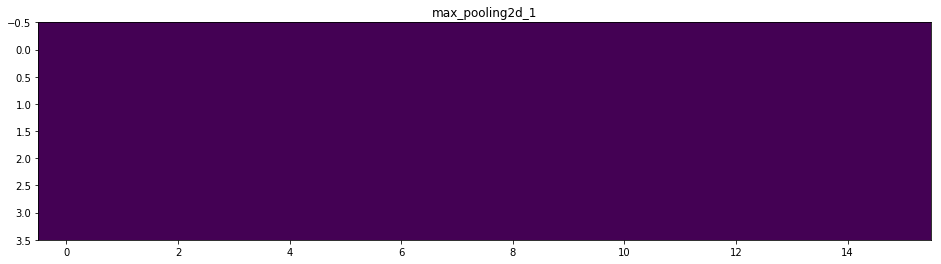

In [94]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:4]]

activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

activations = activation_model.predict(preprocessed_test_images_7)

layer_name = []

#取model前8层的层名称
for l in model.layers[:4]:
    layer_name.append(l.name)

    


images_per_row = 16 #每行放置16个可视化图片

#将每个网络层的名字与输出张量配对
#name表示网络层名称，act表示该层激活函数输出的四维张量值
for name, act in zip(layer_name,activations):
    #取各层的通道数，每层输出张量(批次数, 通道长，通道宽，通道数)，特别注意本模型中每个网络层的通道长与宽相等
    n_features = act.shape[-1]
    #排列各通道输出激活函数值
    rows = n_features//images_per_row
    size = act.shape[1]
    #预先建立承载可视化矩阵的网格，即每个网络层所有通道所需要的的数组大小
    display_grid = np.zeros((size * rows, size * images_per_row))
    
    #遍历每一行
    for r in range(rows):
        #遍历每一个通道
        for i in range(images_per_row):
            #逐个获取每个通道的img数组
            channel_img =act[0,:,:, r * images_per_row + i]
            #对特征进行预处理，即标准化处理，类同z-score，使可视化效果更好
            channel_img -= channel_img.mean()
            channel_img /= channel_img.std()
            channel_img *= 64
            channel_img += 128
            #np.clip()将数组按min-max范围进行截取
            channel_img = np.clip(channel_img, 0, 255).astype('uint8')

            
            #将通道图像逐个装入网格中
            display_grid[ r*size:(r+1)*size, i*size:(i+1)*size] = channel_img
            scale = 1./size
            
    scale = 1./size
    plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')